In [1]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

np.random.rand()

In [2]:
start = pd.to_datetime("2012-01-01")
end = pd.to_datetime("2017-01-01")

In [3]:
aapl = yf.download("AAPL",start=start,end=end)
cisco = yf.download("CSCO",start=start,end=end)
ibm = yf.download("IBM",start=start,end=end)
amzn = yf.download("AMZN",start=start,end=end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
aapl.drop(["Open","High","Low","Close","Volume"],axis=1, inplace=True)

In [5]:
cisco.drop(["Open","High","Low","Close","Volume"],axis=1, inplace=True)
ibm.drop(["Open","High","Low","Close","Volume"],axis=1, inplace=True)
amzn.drop(["Open","High","Low","Close","Volume"],axis=1, inplace=True)

In [6]:
len(aapl["Adj Close"])

1258

In [7]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df["Normed return"]=(stock_df["Adj Close"]/stock_df.iloc[0]["Adj Close"])

In [8]:
# Weights:
# 30% AAPL
# 20% cisco
# 40% amazon
# 10% IBM

In [9]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df["Allocation"] = stock_df["Normed return"]*allo

In [10]:
aapl.head()

,Adj Close,Normed return,Allocation
Date,,,
2012-01-03,51.27,1.000000,0.300000
2012-01-04,51.54,1.005266,0.301580
2012-01-05,52.12,1.016579,0.304974
2012-01-06,52.66,1.027111,0.308133
2012-01-09,52.58,1.025551,0.307665


In [11]:
invested = 1000000

In [12]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df["Profit/Loss"]= stock_df["Allocation"]*invested

In [13]:
aapl.head()

,Adj Close,Normed return,Allocation,Profit/Loss
Date,,,,
2012-01-03,51.27,1.000000,0.300000,300000.000000
2012-01-04,51.54,1.005266,0.301580,301579.871270
2012-01-05,52.12,1.016579,0.304974,304973.668812
2012-01-06,52.66,1.027111,0.308133,308133.411352
2012-01-09,52.58,1.025551,0.307665,307665.301346


In [14]:
Total_profit = pd.concat([aapl["Profit/Loss"],cisco["Profit/Loss"],ibm["Profit/Loss"],amzn["Profit/Loss"]],axis=1)

In [15]:
Total_profit.columns = ["Aapl","Cisco","IBM","Amazn"]

In [16]:
Total_profit["Total"]=Total_profit["Aapl"]+Total_profit["Cisco"]+Total_profit["IBM"]+Total_profit["Amazn"]

In [17]:
pd.options.display.float_format = '{:.5f}'.format

In [18]:
Total_profit.tail()

,Aapl,Cisco,IBM,Amazn,Total
Date,,,,,
2016-12-23,653247.51317,377476.25509,414454.46285,424839.41239,1870017.64349
2016-12-27,657401.98947,379375.84803,415544.83819,430877.50656,1883200.18225
2016-12-28,654593.32943,376119.40299,413168.37912,431285.25945,1875166.37099
2016-12-29,654417.78818,376662.14383,414202.83777,427386.47154,1872669.24132
2016-12-30,649327.09187,373677.06920,412665.12896,418851.58912,1854520.87914


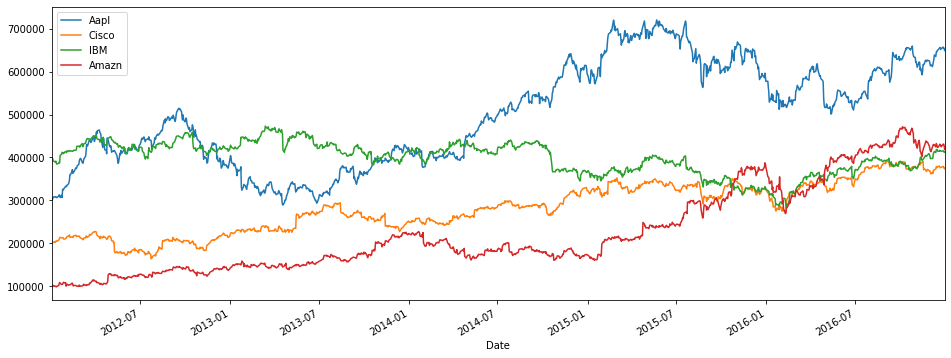

In [19]:
Total_profit.drop("Total",axis=1).plot(figsize=(16,6))

In [20]:
################### Portfolio returns ##########################
Total_profit["return"]= Total_profit["Total"].pct_change(1)

In [21]:
Total_profit.head()

,Aapl,Cisco,IBM,Amazn,Total,return
Date,,,,,,
2012-01-03,300000.00000,200000.00000,400000.00000,100000.00000,1000000.00000,nan
2012-01-04,301579.87127,203934.87110,398350.45782,99150.98028,1003016.18047,0.00302
2012-01-05,304973.66881,203120.75984,396477.24890,99206.83684,1003778.51439,0.00076
2012-01-06,308133.41135,202442.33379,391920.03914,101999.66486,1004495.44914,0.00071
2012-01-09,307665.30135,203663.50068,389879.08017,99737.47417,1000945.35636,-0.00353


In [30]:
p_r = Total_profit["return"].mean()

In [23]:
p_vol = Total_profit["return"].std()

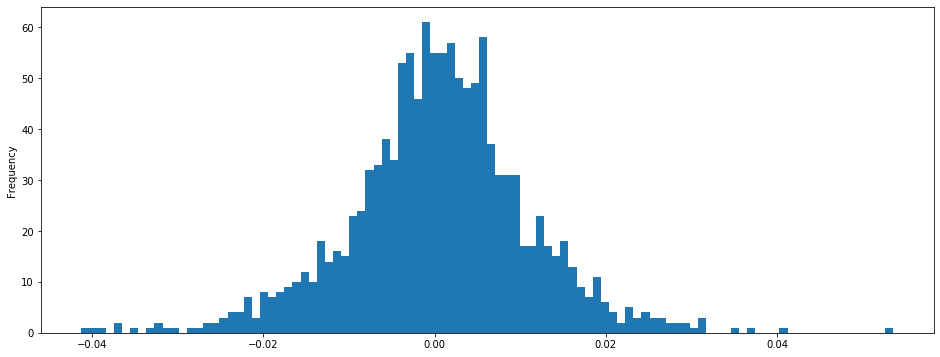

In [25]:
Total_profit["return"].plot(kind="hist",bins=100,figsize=(16,6))

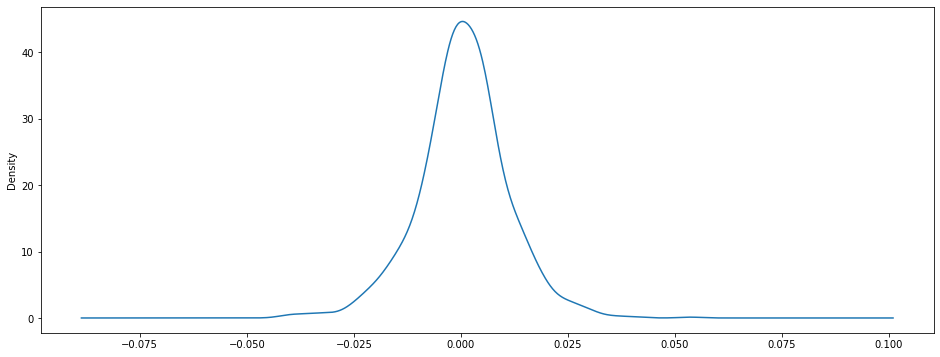

In [26]:
Total_profit["return"].plot(kind="kde",figsize=(16,6))

In [27]:
p_cum = 100*((Total_profit["Total"][-1]/Total_profit["Total"][0])-1)

In [28]:
p_cum

85.45208791430407

In [31]:
p_sr = p_r/p_vol

In [33]:
yearly_factor = np.sqrt(252)

In [34]:
p_asr=p_sr*yearly_factor

In [35]:
p_asr

0.8217356325808581